In [1]:
# import Python packages
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# import dataset
all_data = pd.read_csv('../input/nyc-housing-data-20032019/data.csv')

# drop rows with NaN
all_data.dropna(subset = ['LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT'], inplace = True)

# split all_data into training and testing datasets for linear regression
training_data, testing_data = train_test_split(all_data, test_size = 0.2, random_state = 25)

/kaggle/input/nyc-housing-data-20032019/data.csv


In [2]:
# Step 1: understand the dataset

# shape of the training dataset and teh testing dataset
training_data #1280161 rows × 10 columns
testing_data #320041 rows × 10 columns

# understand the nature of teh training data
training_data.info()
training_data.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1261860 entries, 1506369 to 29828
Data columns (total 10 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   BOROUGH                  1261860 non-null  int64  
 1   NEIGHBORHOOD             1261860 non-null  object 
 2   BUILDING CLASS CATEGORY  1261860 non-null  object 
 3   ADDRESS                  1261860 non-null  object 
 4   ZIP CODE                 1261859 non-null  float64
 5   LAND SQUARE FEET         1261860 non-null  float64
 6   GROSS SQUARE FEET        1261860 non-null  float64
 7   YEAR BUILT               1261860 non-null  float64
 8   SALE PRICE               1261860 non-null  int64  
 9   SALE DATE                1261860 non-null  object 
dtypes: float64(4), int64(2), object(4)
memory usage: 105.9+ MB


,BOROUGH,ZIP CODE,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE
count,1.261860e+06,1.261859e+06,1.261860e+06,1.261860e+06,1.261860e+06,1.261860e+06
mean,2.922713e+00,1.081210e+04,4.214479e+03,4.398764e+03,1.725669e+03,8.427846e+05
std,1.308358e+00,7.669381e+02,4.729340e+05,5.180499e+04,6.206019e+02,1.147850e+07
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,1.030200e+04,0.000000e+00,0.000000e+00,1.915000e+03,0.000000e+00
50%,3.000000e+00,1.120800e+04,1.850000e+03,1.254000e+03,1.931000e+03,3.020000e+05
75%,4.000000e+00,1.135700e+04,2.800000e+03,2.360000e+03,1.964000e+03,6.200000e+05
max,5.000000e+00,3.380300e+04,2.147557e+08,1.496215e+07,2.020000e+03,4.111112e+09


In [3]:
# According to training_data.info(), the following columns have NaN:
# Land square feet has 13751 null values
# Gross square feet has 13750 null values
# Year built has 4816 null values

# According to training_data.describe(), the following columns have values equal to 0 which they should not have:
# Land square feet
# Gross square feet
# Year built
# Sale price

# The following variables may need feature engineering:
# NEIGHBORHOOD
# BUILDING CLASS CATEGORY
# ADDRESS
# ZIP CODE

training_data.describe().columns
df_num = training_data[['LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT']]
df_cat = training_data[['BOROUGH', 'ZIP CODE']]

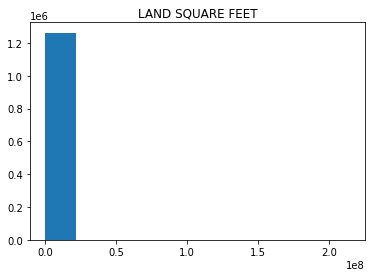

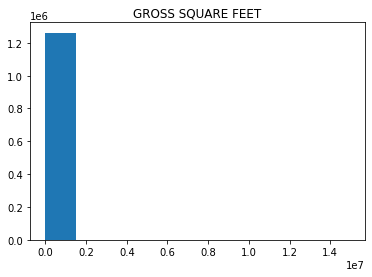

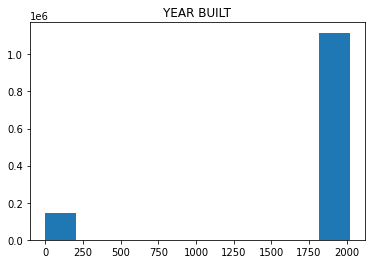

In [4]:
# plot the distribution of the numeric variables
for i in df_num.columns:
    plt.hist(df_num[i])
    plt.title(i)
    plt.show()

In [5]:
# data cleansing for three numerical variables
# drop rows where LAND SQUARE FEET, GROSS SQUARE FEET, YEAR BUILT or Sale price is 0
training_data_drop_0 = training_data.loc[~((training_data['LAND SQUARE FEET'] == 0) | (training_data['GROSS SQUARE FEET'] == 0) | (training_data['YEAR BUILT'] == 0))]
training_data_drop_0.describe()

# NEXT STEP: research about the smallest habitable space; drop outliers
# identifying values that are outside of the outter fence(Q3 + 3*IQ) to be outliers
# outter_fence_land = 2800 + 3*()

,BOROUGH,ZIP CODE,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE
count,718899.00000,718898.000000,7.188990e+05,7.188990e+05,718899.000000,7.188990e+05
mean,3.42067,11007.786525,6.818932e+03,7.677281e+03,1942.042953,8.440001e+05
std,1.04368,494.460212,6.259193e+05,6.840763e+04,32.091210,1.344613e+07
min,1.00000,0.000000,1.000000e+00,1.000000e+00,1018.000000,0.000000e+00
25%,3.00000,10465.000000,2.000000e+03,1.540000e+03,1920.000000,0.000000e+00
50%,4.00000,11221.000000,2.500000e+03,2.160000e+03,1930.000000,3.000000e+05
75%,4.00000,11372.000000,4.000000e+03,3.200000e+03,1960.000000,5.720000e+05
max,5.00000,11697.000000,2.147557e+08,1.496215e+07,2019.000000,4.111112e+09
